# RK2.VS.Leap-Frog.VS.Verlet

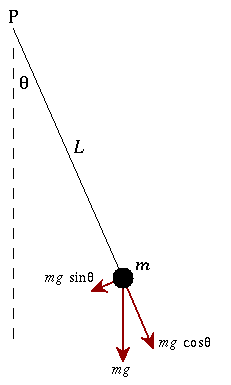

In [1]:
from IPython.display import Image
Image("nonLinearPendulum.gif")

### Péndulo no lineal
El desplazamiento del brazo en la posición vertical está dado en términos de $\theta$ y su dirección tangencial es $l\frac{d^2\theta}{dt^2}$.

$$
ml\frac{d^2\theta}{dt^2} = -mg sin(\theta)
$$

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{l} sin(\theta)
$$

Expresando la ecuación de segundo órden como dos ecuaciones diferenciales de primer órden.

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = -\frac{g}{l}sin\theta
$$


### Ejercicio

Escribir la expresion para la energía en términos de los parametros del péndulo

$E = \frac12 m l^2 \dot{\theta}^2 + m g l(1 -\cos(\theta)) = \frac12 m l^2 \omega^2 + m g l(1- \cos(\theta))$

### Ejercicio

Generaliza la expresión de la energía inicial en todos los códigos

## RK2

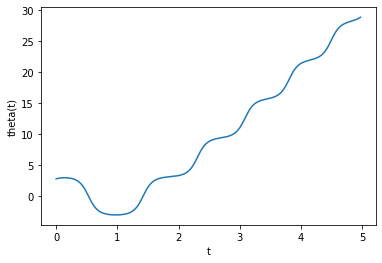

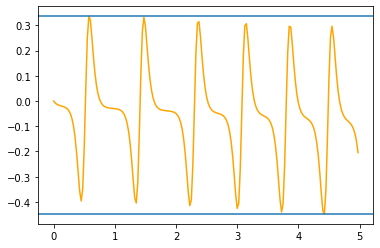

In [2]:
#Runge-Kutta orden 2 pendulo
from pylab import *
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []
lista_omega = []

r = array([160/180*pi,3],float)
#r = array([5/180*pi,0],float)
for t in lista_t:
    lista_theta.append(r[0])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    r+=k2
    lista_omega.append(r[1])

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
inicial_0 =0.5*m*l**2*lista_omega[0]**2 +m*g*l*(1-cos(lista_theta[0]))

for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()


El péndulo tiene velocidad angular inicial tan grande que empieza a dar vueltas

## Leap-Frog

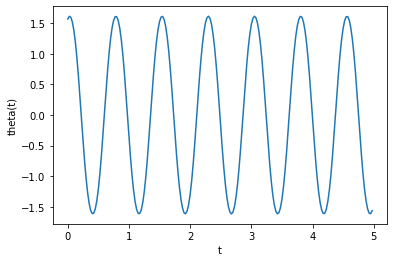

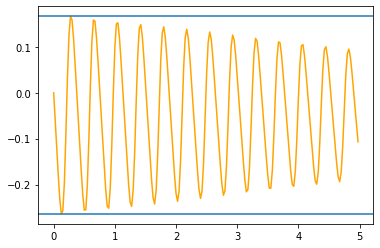

In [10]:
#Solución de Leap-Frog
from pylab import *

g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []
lista_omega = []

#r = array([179/180*pi,0],float)
r = array([90/180*pi,3],float)
rH = r+0.5*h*f(r,0)
for t in lista_t:
    lista_theta.append(r[0])
    r+=h*f(rH,t+0.5*h)
    rH+=h*f(r,t+h)
    lista_omega.append(r[1])
    
plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
inicial_0= 0.5*m*l**2*lista_omega[0]**2 + m*g*l*(1-cos(lista_theta[0]))

for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

    
dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()

## Verlet

Supongamos que queremos usar leapfrog para resolver ecuaciones clásicas de movimiento para un sistema físico dado. Si usamos podemos expresar la seguna ley de Newton de la siguiente forma:

$$
\frac{d^2x}{dt^2} = f(x,t)
$$

Luego convertimos este sistema de ecuaciones de movimiento a ecuaciones diferenciales acopladas de primer orden:

$$
\frac{dx}{dt}=v, \frac{dv}{dt}=f(x,t) 
$$

Usamos $v$ para recordar que hablamos de un sistema fîsico.

Ahora si tenemos $x$ a un tiempo $t$ y v a un tiempo $t+\frac{1}{2}h$. Entonces iterando sobre las siguientes expresiones:

$$
x(t+h) = x(t) + hv(t+\frac{1}{2}h)\\
v(t+\frac{3}{2}h)=v(t+\frac{1}{2}h)+hf(x(t+h), t+h)
$$

Obtenemos $x$ a cualquier tiempo que deseemos, y en consecuencia tambien la $t$ pero siempre desfasada un medio de $h$. Dependiendo del sistema y el tamaño del paso medir la energía con velocidad desfasada involucra una pequeña impresición. Para conocer energía a un tiempo determinado tenemos que realizar operaciones extras en la velocidad.

Digamos que si tenemos la velocidad a un tiempo $t+h$, simplemente hacemos un paso medio para atrás usando el método de Euler para tenerlo en el tiempo $t+\frac{1}{2}h$:

$$
v(t+\frac{1}{2}h) = v(t+h) - \frac{1}{2}h f(x(t+h),t+h)
$$

Reacomodando:

$$
v(t+h) = v(t+\frac{1}{2}h) + \frac{1}{2}h f(x(t+h),t+h)
$$

Lo cual nos permite saber en pasos enteros de $h$ la velocidad. De esta forma si conocemos los valores iniciales $x,v$ a algûn tiempo $t$ entonces:

$$
v(t+\frac{1}{2}h) = v(t) + \frac{1}{2}h f(x(t),t)
$$

Y a partir de ahí aplicamos de forma iterativa:

$$
x(t+h) = x(t) + hv(t+\frac{1}{2}h),\\
k=hf(x(t+h), t+h),\\
v(t+h) = v(t+\frac{1}{2}h)+\frac{1}{2}k,\\
v(t+\frac{3}{2}h) = v(t+\frac{1}{2}h)+k
$$



### Ejercicio

Generalizar a ecuaciones de movimiento en más de una dimensión.

Supongamos que queremos usar leapfrog para resolver ecuaciones clásicas de movimiento para un sistema físico dado. Si usamos podemos expresar la seguna ley de Newton de la siguiente forma:

$$
\frac{d^2\vec{r}}{dt^2} = \textbf{f}(\vec{r},t)
$$

Luego convertimos este sistema de ecuaciones de movimiento a ecuaciones diferenciales acopladas de primer orden:

$$
\frac{d\vec{r}}{dt}=\vec{v}, \frac{d\vec{v}}{dt}=\textbf{f}(\vec{r},t) 
$$

Usamos $\vec{v}$ para recordar que hablamos de un sistema fîsico.

Ahora si tenemos $\vec{r}$ a un tiempo $t$ y $\vec{v}$ a un tiempo $t+\frac{1}{2}h$. Entonces iterando sobre las siguientes expresiones:

$$
\vec{r}(t+h) = \vec{r}(t) + h\vec{v}(t+\frac{1}{2}h)\\
\vec{v}(t+\frac{3}{2}h)=\vec{v}(t+\frac{1}{2}h)+h\textbf{f}(\vec{r}(t+h), t+h)
$$

Obtenemos $\vec{r}$ a cualquier tiempo que deseemos, y en consecuencia tambien la $t$ pero siempre desfasada un medio de $h$. Dependiendo del sistema y el tamaño del paso medir la energía con velocidad desfasada involucra una pequeña impresición. Para conocer energía a un tiempo determinado tenemos que realizar operaciones extras en la velocidad.

Digamos que si tenemos la velocidad a un tiempo $t+h$, simplemente hacemos un paso medio para atrás usando el método de Euler para tenerlo en el tiempo $t+\frac{1}{2}h$:

$$
\vec{v}(t+\frac{1}{2}h) = \vec{v}(t+h) - \frac{1}{2}h \textbf{f}(\vec{r}(t+h),t+h)
$$

Reacomodando:

$$
\vec{v}(t+h) = \vec{v}(t+\frac{1}{2}h) + \frac{1}{2}h \textbf{f}(\vec{r}(t+h),t+h)
$$

Lo cual nos permite saber en pasos enteros de $h$ la velocidad. De esta forma si conocemos los valores iniciales $\vec{r},\vec{v}$ a algûn tiempo $t$ entonces:

$$
\vec{v}(t+\frac{1}{2}h) = \vec{v}(t) + \frac{1}{2}h \textbf{f}(\vec{r}(t),t)
$$

Y a partir de ahí aplicamos de forma iterativa:

$$
\vec{r}(t+h) = \vec{r}(t) + h\vec{v}(t+\frac{1}{2}h),\\
k=h\textbf{f}(\vec{r}(t+h), t+h),\\
\vec{v}(t+h) = \vec{v}(t+\frac{1}{2}h)+\frac{1}{2}k,\\
\vec{v}(t+\frac{3}{2}h) = \vec{v}(t+\frac{1}{2}h)+k
$$



### Ejercicio

Agregar una gráfica del espacio fase usando multiples condiciones iniciales (cambia v!). Y describe el sistema.

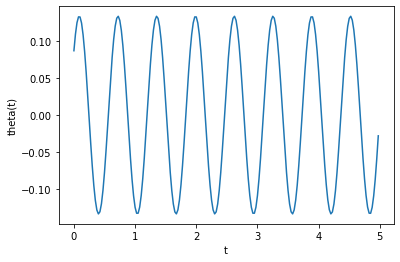

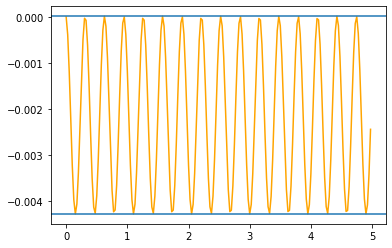

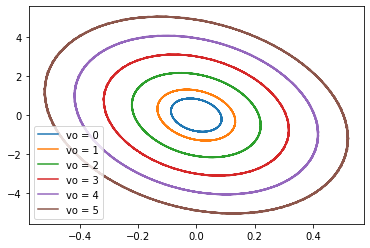

In [17]:
#Verlet
from pylab import *

g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []
lista_omega = []

#r = array([179/180*pi,0],float) #condiciones iniciales
r = array([5/180*pi,1],float) #condiciones iniciales
rH = r+0.5*h*f(r,0) #inicio paso intermedio
for t in lista_t:
    lista_theta.append(r[0])
    r+=h*f(rH,t+0.5*h)
    k=h*f(r,t+h)
    v=rH+0.5*k
    rH+=h*f(r,t+h)
    lista_omega.append(v[1])
    
plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
inicial_0 = 0.5*m*l**2*lista_omega[0]**2 + m*g*l*(1-cos(lista_theta[0]))

for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()

#Gráfica del espacio fase a distintas velocidades iniciales
for vo in [0,1,2,3,4,5]:
    lista_theta = []
    lista_omega = []

    r = array([5/180*pi,vo],float) #condiciones iniciales
    rH = r+0.5*h*f(r,0) #inicio paso intermedio
    for t in lista_t:
        lista_theta.append(r[0])
        r+=h*f(rH,t+0.5*h)
        k=h*f(r,t+h)
        v=rH+0.5*k
        rH+=h*f(r,t+h)
        lista_omega.append(v[1])
    
    plot(lista_theta,lista_omega,label='vo = '+str(vo))
plt.legend()
show()

## Reversibilidad temporal

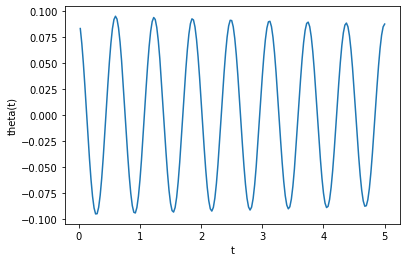

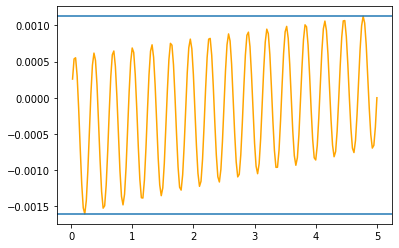

In [18]:
#Runge-Kutta orden 2 pendulo
from pylab import *
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200
h = (b-a)/N

lista_t = arange(b,a,-h)
lista_theta = []
lista_omega = []

#r = array([179/180*pi,0],float)
r = array([5/180*pi,0],float)

for t in lista_t:
    lista_theta.append(r[0])
    k1=-h*f(r,t)
    k2=-h*f(r+0.5*k1,t-0.5*h)
    r+=k2
    lista_omega.append(r[1])

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
inicial_0=0.5*m*l**2*lista_omega[0]**2+m*g*l*(1-cos(lista_theta[0]))

for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()


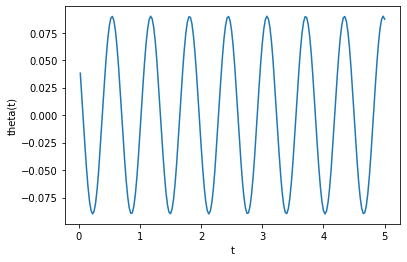

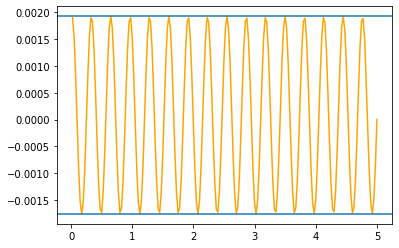

In [19]:
#Solución de Leap-Frog
from pylab import *

g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200 
h = (b-a)/N

lista_t = arange(b,a,-h)
lista_theta = []
lista_omega = []

#r = array([179/180*pi,0],float)
r = array([5/180*pi,0],float)
rH = r+0.5*h*f(r,0)
for t in lista_t:
    lista_theta.append(r[0])
    r-=h*f(rH,t-0.5*h)
    rH-=h*f(r,t-h)
    lista_vy.append(r[1])
    
plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
inicial_0=0.5*m*l**2*lista_omega[0]**2+m*g*l*(1-cos(lista_theta[0]))

for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

    
dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()

### Ejercicio
Orbita de la tierra alrededor del sol.

1) Investiga los parámetros relevantes para el sistema tierra sol.

2) Establece la ecuación diferencial vectorial ($\mathbf{r}=(x,y)$) de segundo orden para este sistema.

3) Resuelve numéricamente, usando Verlet, el sistema tierra sol calculando la orbita de la tierra (usa pasos de una hora)

4) Grafica la energía total en función del tiempo.

#### 1) Parámetros relevantes

In [3]:
M = 1.989E30 #Masa del sol en kg
m = 5.972E24 #Masa de la tierra en kg
R = 149597870 #Distancia de la tierra al sol en km (condición inicial)
w = 2*np.pi/365 #Velocidad angular en radianes por día (condición inicial)
G = 6.67430E-11 #Constante de gravedad universal en m^3 kg^-1 s^-2
G = G * (24*60**2)**2 *(1000**(-3)) #Cambiamos a km^3 kg^-1 dia^-2

#### 2) Ecuación diferencial vectorial

Tomanmos $\vec{r} = (x,y)$. Por segunda Ley de Newton:

$$
m \frac{d^2\vec{r}}{dt^2} = -G\frac{mM}{r^2}\hat{r}
$$

Tomando $\dot{\vec{r}} = (\dot{x},\dot{y}) = (v_x,v_y)$, entonces

$$
\frac{dx}{dt} = v_x,
$$

$$
\frac{dy}{dt} = v_y,
$$

$$
\frac{dv_x}{dt} = -G\frac{M}{(x^2+y^2)^{3/2}}x
$$

$$
\frac{dv_y}{dt} = -G\frac{M}{(x^2+y^2)^{3/2}}y
$$

son las 4 ecuaciones de movimiento con 4 variables listas para programar (no importa la masa de la tierra).

#### 3) Resolución numérica

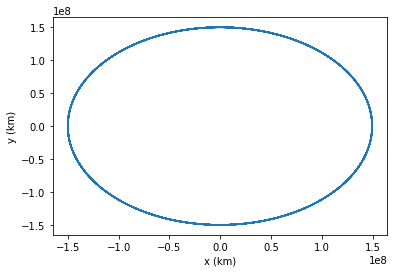

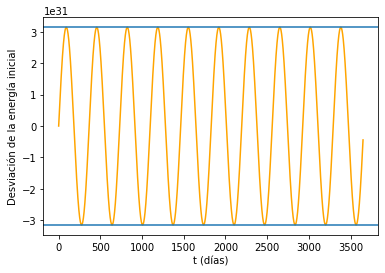

In [36]:
from pylab import *

#r = (x,y,vx,vy)

def f(r,t):
    #x, y, vx, vy = r
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx
    fy = vy
    fvx = -G*M*x/(x**2+y**2)**(3/2)
    fvy = -G*M*y/(x**2+y**2)**(3/2)
    return array([fx,fy,fvx,fvy],float)

a = 0.0
b = 10*365 #Calculamos por un periodo de 10 años
N = 10*365*24 #Pasos de una hora (La unidad de tiempo está en días)
h = (b-a)/N

lista_t = arange(a,b,h)
lista_x = []
lista_y = []
lista_vx = []
lista_vy = []

r = array([R,0,0,R*w],float) #Empieza en (x,y) = (R,0) con velocidad perpendicular (0,Rw) para hacer trayectoria circular
rH = r+0.5*h*f(r,0) #inicio paso intermedio
for t in lista_t:
    lista_x.append(r[0])
    lista_y.append(r[1])
    r+=h*f(rH,t+0.5*h)
    k=h*f(r,t+h)
    v=rH+0.5*k
    rH+=h*f(r,t+h)
    lista_vx.append(v[2])
    lista_vy.append(v[3])
    
plot(lista_x,lista_y)
xlabel('x (km)')
ylabel('y (km)')
show()

E=[]
inicial_0 = 0.5*m*(lista_vx[0]**2+lista_vy[0]**2) - G*m*M/sqrt(lista_x[0]**2+lista_y[0]**2)

for i in range(len(lista_t)):
    cinetica=0.5*m*(lista_vx[i]**2+lista_vy[i]**2)
    potencial=- G*m*M/sqrt(lista_x[i]**2+lista_y[i]**2)
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
plt.xlabel('t (días)')
plt.ylabel('Desviación de la energía inicial')
show()